In [1]:
import numpy as np
from control.matlab import *
from matplotlib import pyplot as plt

# シミュレーション

In [2]:
#伝達関数の生成
sys = ss("-3, -2; -2, -3","0;0","1, 0",0);
print(sys)#状態ベクトルを確認


#1～10 s を100 Hz でシミュレーション
t = np.arange(0,10,step=0.01);
u = np.zeros(np.size(t));
x0 = [[2],[1]];

#今回はlsim関数を利用．x の内部に各状態の時間変化が格納される．
y, T, x=lsim(sys, U=u, T=t, X0=x0);

A = [[-3. -2.]
     [-2. -3.]]

B = [[0.]
     [0.]]

C = [[1. 0.]]

D = [[0.]]



# 計算で求めた解析解

In [3]:
Xa1 = 3/2*np.exp(-5*t)+ 1/2*np.exp(-t);
Xa2 = 3/2*np.exp(-5*t)- 1/2*np.exp(-t);

# 結果の比較

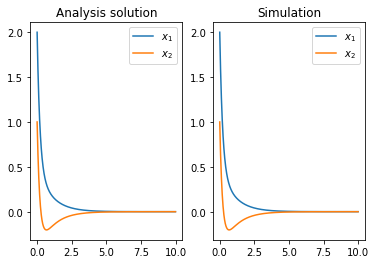

In [4]:
fig, axes = plt.subplots(1,2)
axes[0].plot(T, Xa1);#X1の解析解
axes[0].plot(T, Xa2);#X2の解析解
axes[0].set_title("Analysis solution");
axes[0].legend(["$x_1$","$x_2$"]);

axes[1].plot(T,x[:,0]);#X1の数値解
axes[1].plot(T,x[:,1]);#X2の数値解
axes[1].set_title("Simulation");
axes[1].legend(["$x_1$","$x_2$"]);
plt.show()

## 誤差チェック（念のため）

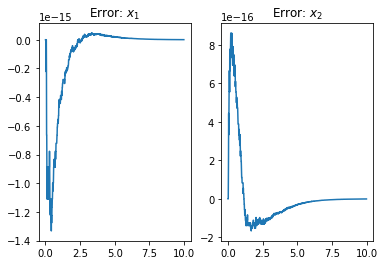

x1(t)の誤差の絶対値平均:1.2e-16
x2(t)の誤差の絶対値平均:9.2e-17


In [13]:
fig, axes = plt.subplots(1,2)
axes[0].plot(T,Xa1 -x[:,0]);
axes[0].set_title("Error: $x_1$");
axes[1].plot(T,Xa2 -x[:,1]);
axes[1].set_title("Error: $x_2$");
plt.show()
print("x1(t)の誤差の絶対値平均:%.2g"%(np.mean(np.abs(Xa1-x[:,0]) ) ) )
print("x2(t)の誤差の絶対値平均:%.2g"%(np.mean(np.abs(Xa2-x[:,1]) ) ) )